<a href="https://colab.research.google.com/github/osum97/python_create_app_1/blob/master/%EC%95%94_%EC%A7%84%EB%8B%A8_%EB%B6%84%EB%A5%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8%EB%A7%8C%EB%93%A4%EA%B8%B0_%EC%A0%95%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **심화도전2**
### **Breast cancer wisconsin 데이터를 이용한 <span style="color:darkgreen">AI분류</span> 문제**
---

#### 암세포의 형태 데이터를 이용하여 암 진단 판정을 악성과 양성으로 분류하는 AI문제입니다.
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
#### ( Breast cancer wisconsin 데이터 : sklearn 내장 연습용 데이터셋 사용)

 - 데이터 : 분류(카테고리)
 - 모델 : KNN(머신러닝 모델 비교 분석), DeepLearning
 - 주요 전처리 : 분석 Column 추가, 표준화(standardization)
 - 주요 학습 내용 : 이중 분류 모델 생성(binary 분류, input, output 처리, 손실함수 등), 머신러닝 모델 비교학습(리스트 활용)
---

**아래 측정값들을, 평균(mean), 표준오차(error), 제일 큰 값 3개의 평균(worst)으로 나타낸다. 예를 들어 radius는 mean radius, radius error, worst radius 3개 컬럼으로 나타난다.**<br>

- radius : 암세포의 반지름
- texture : 질감
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- concavity : 오목함
- concave points : 오목한 곳의 수
- symmetry : 대칭성
- fractal dimension : 프렉탈 차원
- class : 라벨(y변수) 데이터로 세포의 양성/악성 여부를 binary로 표기한 데이터
    * 0 : malignant : 악성
    * 1 : benign : 양성


---
> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시오.**<br>
> **sklearn에서 제공하는 load_breast_cacncer에 대한 데이터를 불러올 예정입니다. <span style="color:darkgreen"></span>**<br>
> 분석할 feautre 데이터는 x 변수에, 라벨은 y변수에 저장 되게 됩니다.(사전 x,y 데이터 분리 실행)
> y변수는 상기 서술된 컬럼 중 class 항목입니다.


---



<br>
<br>
<br>

### **Q1. pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [ ]:
# 여기에 답안코드를 작성하세요

import pandas as pd

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [ ]:
# 여기에 답안코드를 작성하세요

import matplotlib.pyplot as plt

### **Q3. 'breast_cacncer3.csv' 파일을 읽어 bcc dataframe 변수에 저장하세요.**
* **
- 파일명 'breast_cacncer3.csv' 을 read_csv 함수를 활용하여 읽어오기
- 데이터 프레임의 변수 명은 bcc 로 한다.
---

In [ ]:
# 여기에 답안코드를 작성하세요

bcc = pd.read_csv('breast_cacncer3.csv')
bcc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Q4. 아래 가이드대로 진행 하세요.**
* **
- seaborn 임포트하세요
- seaborn의 scatterplot으로 그리세요.
  - x : 'mean radius'
  - y : 'mean area'
  - hue : 'target'
- 출력된 그래프를 보고 아래 보기 답안중에 틀린것을 변수04에 저장하세요(예, 변수04=5)
    1. 'mean radius' 컬럼과 'mean area' 컬럼 간에는 양의 비례 관계가 보인다.
    2. 그래프를 보면, target 악성(0)이 위쪽에 위치하고 있으며 target 양성(1)은 아래쪽에 분포한다.
    3. 그래프를 보면, 심각한 이상치 데이터는 보이지 않는다.
---

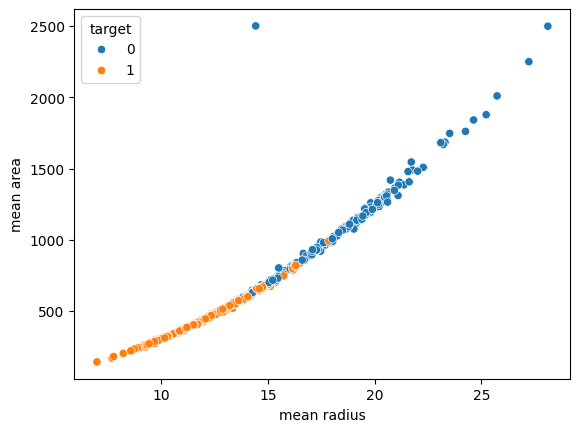

In [ ]:
# 여기에 답안코드를 작성하세요

import seaborn as sns
sns.scatterplot(data=bcc, x='mean radius', y='mean area', hue='target')
변수04=3

### **Q5. 데이터 프레임 bcc에 대한 가이드 대로 결측치와 이상치 처리하세요.**
* **
- 먼저, 위의 그래프에서 보이는 1개의 이상치 데이터를 찾아 삭제하세요.
- 그다음, 결측치를 확인하는 코드를 작성하세요..
- 연속형 컬럼에 대해서는 결측치를 평균값으로 채우세요.
- 결측치 처리 결과를 bcc_null 데이터프레임에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요


bcc_null = bcc.copy()
print('처리전:', bcc_null.shape)

cond = (bcc_null['mean area'] > 2500)
bcc_null = bcc_null[ ~cond ]

bcc_null.isnull().sum()
bcc_null['mean radius'] = bcc_null['mean radius'].fillna(bcc_null['mean radius'].mean())
bcc_null['mean concavity'] = bcc_null['mean concavity'].fillna(bcc_null['mean concavity'].mean())

bcc_null.isnull().sum()
print('처리후:', bcc_null.shape)

처리전: (569, 31)
처리후: (568, 31)


### **Q6. 아래 가이드대로 데이터프레임을 만들고 그룹화하세요.**
* **
- target 컬럼을 기준으로 그룹화하세요.
  - 대상 데이터프레임 : bcc_null
  - groupby 함수 활용하시고 각 컬럼의 평균을 출력하세요.
- 그룹화 결과에서  target이 0 일때, 가장 큰값을 갖는 컬럼명을 변수05 저장하세요.(예, 변수05='컬럼명')
  - loc 함수와 sort_values 함수를 사용하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요

변수05='worst area'
res = bcc_null.groupby('target').mean()
res.loc[0].sort_values(ascending=False)

,0
worst area,1408.865877
mean area,971.160190
worst perimeter,140.849810
mean perimeter,115.026351
area error,70.447156
worst texture,29.308483
mean texture,21.582796
worst radius,21.064171
mean radius,17.428382
perimeter error,4.256033


<br>

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시기 바랍니다.**
>

In [ ]:
import numpy as np
plt.figure(figsize=(12,7))

bcc_mean = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension' ]

bcc_error = [ 'compactness error', 'symmetry error' ]

<Figure size 1200x700 with 0 Axes>

<br>

### **Q7. 데이터 프레임 bcc_null에 대해 가이드대로 시각화 하세요.**
* **
- 먼저, 위의 정의된 bcc_error 리스트 컬럼들을 삭제하세요.
- 그리고, 숫자형 데이터에 대해서 heatmap 그래프를 그리세요.
  - 데이터 : 위의 정의된  bcc_mean 리스트 컬럼에 대한 상관관계
  - heatmap 안에 상관관계 수치를 표시하세요.
  - 'mean radius' 컬럼과 가장 높은 상관관계를 갖는 컬러명을 변수06 저장하세요.(예, 변수07='컬럼명')
---

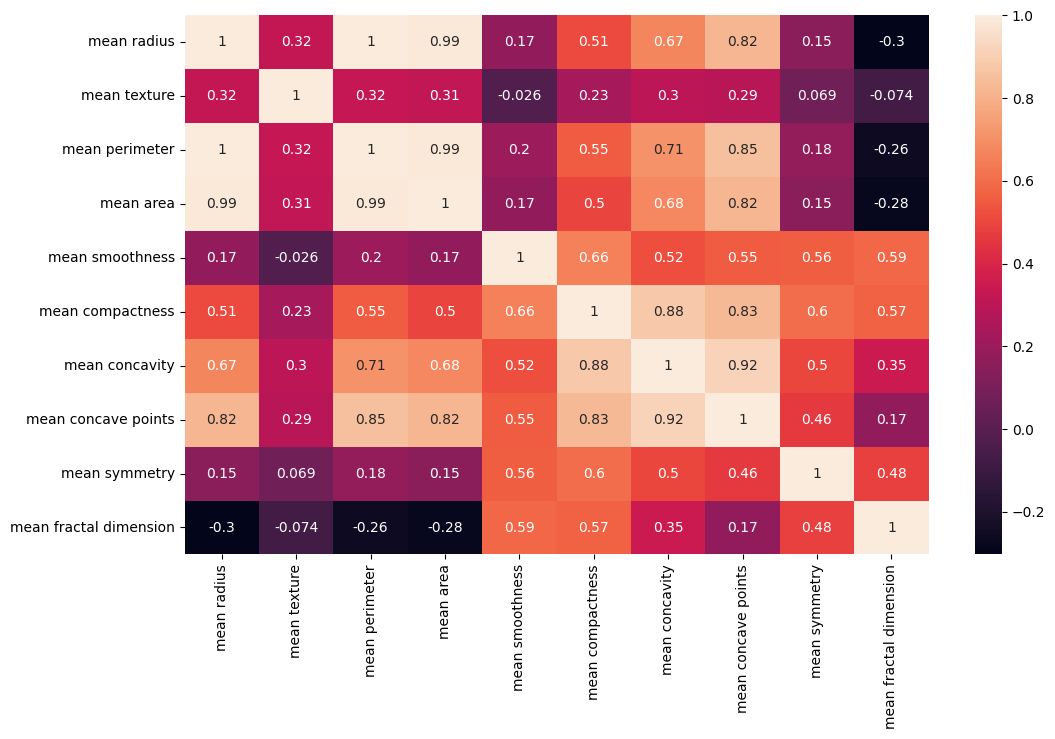

In [ ]:
# 여기에 답안코드를 작성하세요


bcc_null.drop(bcc_error, axis=1, inplace=True)

plt.figure(figsize=(12,7))
corr = bcc_null[ bcc_mean ].corr()
sns.heatmap(corr, annot=True)

변수07='mean perimeter'

### **Q8. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
* **
- sklearn.model_selection 밑에 train_test_split 함수를 사용하세요.
- y는 bcc_null 데이터프레임의 'target'컬럼이고 x는 그 나머지 컬럼이다.
- train : test = 8 : 2
- y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_test, y_test
- random state은 2021로 설정한다.
---

In [ ]:
# 여기에 답안코드를 작성하세요

from sklearn.model_selection import train_test_split

x = bcc_null.drop('target', axis=1)
y = bcc_null['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((454, 28), (114, 28), (454,), (114,))

### **Q9. x_train, x_test의 모든 컬럼을 각각 표준화(standardization) 스케일링 하시기 바랍니다.**
* **
- **모든 전처리 규칙은 트레이닝셋으로 부터 선정한다.**
- sklearn.preprocessing 밑의 StandardScaler 함수 사용하세요.
- 스케일링한 x들은 각각 아래의 변수에 따로 선언해둔다.
    * x_train_sc
    * x_test_sc
---

In [ ]:
# 여기에 답안코드를 작성하세요
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

### **Q8. RandomForest 모델들을 학습시키시기 바랍니다.**
* **
- sklearn.ensemble 밑에 RandomForestClassifier 함수 활용합니다.
- 트레이닝 셋 (x_train_sc, y_train)을 이용하여 학습시킨다.
- RandomForestClassifier 모델 이름을 rfc로 정의합니다.   
- rfc 모델 정의시, n_estimators : 100, max_depth : 10 설정합니다.
- score 함수를 사용하여 테스트셋(x_test_sc, y_test)의 accuracy 정확도를 확인하세요
---

In [ ]:
# 여기에 답안코드를 작성하세요

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth=10)
rfc.fit(x_train_sc, y_train)
rfc.score(x_test_sc, y_test)

0.9736842105263158

### **Q9. 위의 Randomforest 모델의 변수중요도를 확인합니다.**
* **
- rfc 모델에 대한 feature_importances_(변수중요도)를 구하세요.
- pd.Series와 x_train의 컬럼명과 Sort_values을 활용해서 제일 중요한 변수를 찾아 변수9에 저장하세요.(예, 변수9='컬럼명')
---

In [ ]:
# 여기에 답안코드를 작성하세요

변수9='worst perimeter'
pd.Series(rfc.feature_importances_ , index=x_train.columns).sort_values(ascending=False)

,0
worst perimeter,0.136035
worst area,0.129777
worst radius,0.119787
worst concave points,0.109555
mean area,0.063015
mean concave points,0.059227
mean concavity,0.058232
area error,0.053663
mean radius,0.041634
worst concavity,0.035965


### **Q10. XGB 모델들을 학습시키시기 바랍니다.**
* **
- xgboost 밑에 XGBClassifier 함수 활용합니다.
- 트레이닝 셋 (x_train_sc, y_train)을 이용하여 학습시킨다.
- XGBClassifier 모델 이름을 xgbc로 정의합니다.   
- xgbc 모델 정의시, n_estimators : 400, learning_rate : 0.05, max_depth : 3 설정합니다.
- score 함수를 사용하여 테스트셋(x_test_sc, y_test)의 accuracy 정확도를 확인합니다. 하세요
---

In [ ]:
# 여기에 답안코드를 작성하세요

# !pip install xgboost
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
xgbc.fit(x_train_sc, y_train)
xgbc.score(x_test_sc, y_test)


1.0

### **Q11. 테스트 셋을 이용하여 학습된 2개 모델의 성능을 출력하시기 바랍니다.**
* **
- 앞의 rfc 모델과 xgbc 모델로 테스트셋(x_test_sc)을 예측하여 결과값을 각각 rfc_pred, xgbc_pred에 저장하세요.
- 평가를 위한 성능평가함수는 정확도와 f1-score 를 이용하여 2개 모델에 대해서 정확도와 f1-score 성능을 출력하세요.
- sklearn.metrics 밑에 accuracy_score, f1_score 함수 활용하세요.
- f1-score 성능이 높은 모델의 이름을 변수11에 저장하세요.
  - 예, 변수11='rfc' or 변수11='xgbc'
---

In [ ]:
# 여기에 답안코드를 작성하세요

변수11='xgbc'
from sklearn.metrics import accuracy_score, f1_score

rfc_pred = rfc.predict(x_test_sc)
print(f'rfc Accuracy : { accuracy_score(y_test, rfc_pred) }')
print(f'rfc F1-score : { f1_score(y_test, rfc_pred) } ')


xgbc_pred = xgbc.predict(x_test_sc)
print(f'xgbc Accuracy : { accuracy_score(y_test, xgbc_pred) }')
print(f'xgbc F1-score : { f1_score(y_test, xgbc_pred) } ')



rfc Accuracy : 0.9736842105263158
rfc F1-score : 0.9793103448275863 
xgbc Accuracy : 1.0
xgbc F1-score : 1.0 


### **Q12. rfc 모델의 classificaiton report를 출력하고, 악성(0)의 precision 값을 출력하시오**
---
  - sklearn.metrics 밑의 classification_report 함수 활용한다.
  - rfc 모델로 테스트셋에 대해서 예측한 결과 rfc_pred 변수를 활용한다.
  - classificaiton report를 출력하고 , 악성(0)의 precision 값을 변수12에 저장하세요.(예, 변수12=0.25)
---

In [ ]:
# 여기에 답안코드를 작성하세요

변수12=0.98
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, rfc_pred, ))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **Q13. rfc 모델의 오차행렬의 결과를 heatmap으로 출력하시오.**
---
  - sklearn.metrics 밑의 confusion_matrix 함수 활용한다.
  - rfc 모델로 테스트셋에 대해서 예측한 결과 rfc_pred 변수를 활용한다.
  - 오차행렬을 만들어 그래프 heatmap으로 출력하세요. annot 설정하여 숫자를 보이도록 합니다.
---

<Axes: >

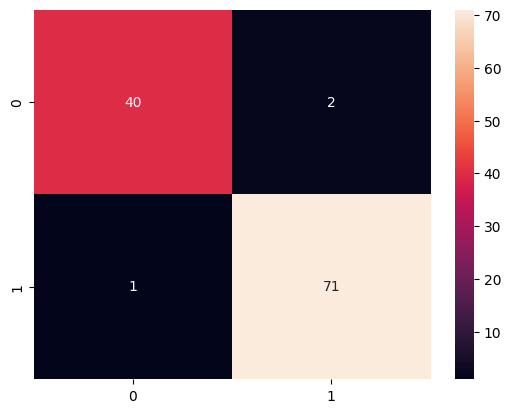

In [ ]:
# 여기에 답안코드를 작성하세요

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, rfc_pred )
sns.heatmap(cm, annot=True)

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### **Q14. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
    * 2개 이상의 hidden layer를 사용할 것
    * Drop out과 batchnormalization을 각각 한번 이상 사용한다.
- Early stopping을 이용하여, validation loss가 10번 이상 개선되지 않으면 학습을 중단 시킨다.
- ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 best_model.keras 파일로 저장한다.
- 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
- y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
- 0,1로 구분된 binary 분류모델에 맞는 loss function인 binary_crossentropy를 사용하도록 한다.
- DNN 학습시 , 스케일링된 데이터 x_train_sc 데이터를 사용한다.
- 매 epoch 마다 데스트 데이터셋(x_test_sc , y_test) 활용하여 val_loss와 val_accuracy를 검증하도록 한다.
- epochs는 2000번을 지정한다.
---

In [ ]:
# 여기에 답안코드를 작성하세요


model = Sequential()
model.add(Dense(64, activation='swish', input_shape=(x_train.shape[-1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',  patience=10, verbose=1, restore_best_weights=True)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)
history = model.fit(x_train_sc, y_train, epochs=2000, batch_size=32,
                    verbose=1,validation_data=(x_test_sc, y_test),callbacks=[es, mc])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5917 - loss: 0.8241 - val_accuracy: 0.8333 - val_loss: 0.5743
Epoch 2/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7564 - loss: 0.5307 - val_accuracy: 0.8947 - val_loss: 0.4639
Epoch 3/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8183 - loss: 0.4527 - val_accuracy: 0.9123 - val_loss: 0.3833
Epoch 4/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8349 - loss: 0.3739 - val_accuracy: 0.9474 - val_loss: 0.3149
Epoch 5/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8195 - loss: 0.3780 - val_accuracy: 0.9649 - val_loss: 0.2568
Epoch 6/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8809 - loss: 0.2829 - val_accuracy: 0.9649 - val_loss: 0.2166
Epoch 7/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8852 - loss: 0.2865 - val_accuracy: 0.9649 - val_loss: 0.1833
Epoch 8/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9144 - loss: 0.2423 - val_accuracy:

### **Q15. 위의 저장된 DNN 모델로 시물레이션 하기**
* **
- load_model을 활용하여저장된 'best_model.keras' 모델을 불러옵니다.
- 아래 시뮬레이션 데이터를 입력받아 결과를 예측하세요.
---

> **<span style="color:red">DNN 입력으로 사용할 시뮬레이션 데이터**
>

In [ ]:
simul = np.array( [ [ 1.63838833,  0.54674756,  1.62146672,  1.63050328,  0.08789968,
        0.52846353,  1.22476728,  1.59619502, -0.80520827,  0.92630882,
        1.93334623,  1.34228719,  0.82703341, -0.75400678,  0.42898083,
        1.04235095,  2.0665649 , -0.18077013,  1.38073123,  1.43468479,
        1.54227457,  1.21760637, -0.48248057,  0.5482635 ,  0.92616064,
        1.67430567,  1.779817  , -0.26718346] ] )

In [ ]:
# 여기에 답안코드를 작성하세요

best_model = load_model('best_model.keras')
best_model.predict(simul)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.00023627]], dtype=float32)